In [9]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
digits = load_digits()
X = digits['data']
y = digits['target']

In [11]:
def get_random_weight(incoming_conn, outgoing_conn):
    epsilon_init = 0.12
    weight = np.random.rand(outgoing_conn, incoming_conn + 1) * 2 * epsilon_init - epsilon_init
    return weight

In [12]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [13]:
def sigmoid_gradient(z):
    sigmoid_ = sigmoid(z)
    gradient = sigmoid_ * (1 - sigmoid_)
    return gradient

In [14]:
def get_predictions(X, theta1, theta2):
    m = X.shape[0]
    A1 = np.hstack((np.ones((m, 1)), X))
    Z2 = A1 @ theta1.T
    A2 = np.c_[np.ones((Z2.shape[0], 1)), sigmoid(Z2)]
    Z3 = A2 @ theta2.T
    A3 = H = sigmoid(Z3)
    return H

In [15]:
def vectorize_targets(y):
    m = y.shape[0]
    I = np.eye(10)
    Y = np.zeros((m, 10))
    
    for i in range(m):
        Y[i, :] = I[y[i], :]
        
    return Y

In [19]:
def cost_function(X, Y, theta1, theta2, num_labels, lambda_):
    m = X.shape[0]
    H = get_predictions(X, theta1, theta2)
    penalty = (lambda_ / (2 * m)) * (np.sum(theta1[:, 1:]**2) + np.sum(theta2[:, 1:]**2))
    cost = np.sum( (-Y * np.log(H)) - ((1 - Y) * np.log(1 - H)) ) / m
    cost += penalty
    return cost

In [17]:
def get_gradients(X, Y, theta1, theta2, lambda_):
    m = X.shape[0]
    A1 = np.hstack((np.ones((m, 1)), X))
    Z2 = A1 @ theta1.T
    A2 = np.c_[np.ones((Z2.shape[0], 1)), sigmoid(Z2)]
    Z3 = A2 @ theta2.T
    A3 = H = sigmoid(Z3)

    sigma3 = H - Y
    sigma2 = (sigma3 @ theta2) * sigmoid_gradient(np.c_[np.ones(Z2.shape[0]), Z2])
    sigma2 = sigma2[:, 1:]

    delta1 = sigma2.transpose() @ A1
    delta2 = sigma3.transpose() @ A2

    theta1_grad = (delta1 / m) + (lambda_ / m) *  np.c_[np.zeros(theta1.shape[0]), theta1[:, 1:]]
    theta2_grad = (delta2 / m) + (lambda_ / m) *  np.c_[np.zeros(theta2.shape[0]), theta2[:, 1:]]
    return theta1_grad, theta2_grad

In [22]:
theta1 = get_random_weight(X.shape[1], 120)
theta2 = get_random_weight(120, 10)
Y = vectorize_targets(y)
alpha = 0.03
cost_history = []

for i in range(500):
    cost = cost_function(X, Y, theta1, theta2, 10, 1)
    cost_history.append(cost)
    theta1_grad, theta2_grad = get_gradients(X, Y, theta1, theta2, 1)
    theta1 = theta1 - alpha * theta1_grad
    theta2 = theta2 - alpha * theta2_grad

In [24]:
predictions = np.argmax(get_predictions(X, theta1, theta2), axis=1)

In [25]:
y.shape[0] - sum(predictions == y)

59

Text(0, 0.5, 'Cost')

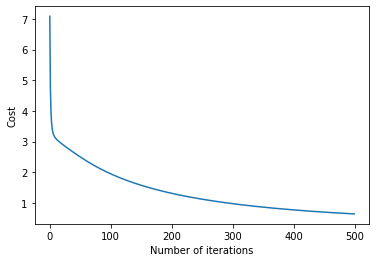

In [27]:
plt.plot(cost_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost')